In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Sum,Days,Color
0,22.072345,36.758307,1
1,37.936710,55.784810,1
2,21.083576,47.319176,1
3,31.120670,54.406780,1
4,43.711550,42.557729,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


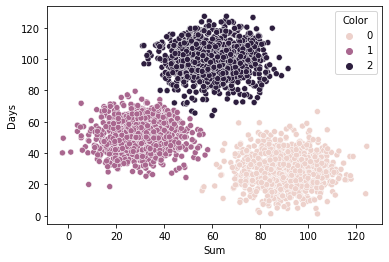

In [ ]:
sns.scatterplot(df['Sum'], df['Days'], hue=df['Color']);

In [ ]:
x = df.iloc[:10, :2]
x

,Sum,Days
0,22.072345,36.758307
1,37.936710,55.784810
2,21.083576,47.319176
3,31.120670,54.406780
4,43.711550,42.557729
5,44.169930,72.024780
6,41.665780,44.892855
7,24.693684,52.342170
8,39.211910,38.878634
9,24.230391,35.558464


In [ ]:
k = 3
x = x.values

np.random.seed(1)
idx = np.random.choice(x.shape[0], k, replace=False)
centroids = x[idx, :]

centroids

array([[21.083576, 47.319176],
       [24.230391, 35.558464],
       [41.66578 , 44.892855]])

In [ ]:
tol = 1e-4
stop_criteria = False

while not stop_criteria:
  distances = cdist(x, centroids, 'euclidean')
  points = distances.argmin(1)

  new_centroids = []

  for i in range(k):
    pts = x[points == i]
    new_centroids.append(pts.mean(axis=0))
  
  old_centroids = centroids.copy()
  centroids = np.vstack(new_centroids)
  stop_criteria = (np.abs(old_centroids - centroids) > tol).sum() == 0

In [ ]:
points

array([1, 2, 0, 0, 2, 2, 2, 0, 2, 1])

In [ ]:
class MyKMeans(object):
  def __init__(self, k, tol=1e-4):
    self.k = k
    self.tol = tol
    self.centroids = None
  
  def fit(self, x):
    idx = np.random.choice(x.shape[0], self.k, replace=False)
    centroids = x[idx, :]
    stop_criteria = False

    while not stop_criteria:
      distances = cdist(x, centroids, 'euclidean')
      points = distances.argmin(1)

      new_centroids = []

      for i in range(self.k):
        pts = x[points == i]
        new_centroids.append(pts.mean(axis=0))
      
      old_centroids = centroids.copy()
      centroids = np.vstack(new_centroids)
      stop_criteria = (np.abs(old_centroids - centroids) > self.tol).sum() == 0
    
    self.centroids = centroids
    return self

  def predict(self, x):
    distances = cdist(x, self.centroids, 'euclidean')
    points = distances.argmin(1)
    return points

In [ ]:
x = df.iloc[:, :2].values
km = MyKMeans(k=3).fit(x)

point = km.predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


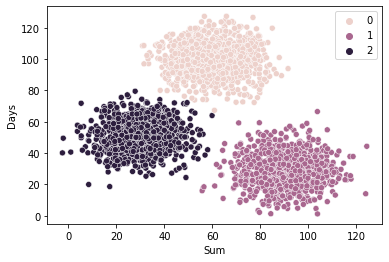

In [ ]:
sns.scatterplot(df['Sum'], df['Days'], hue=point)

# Видео 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,Sum,Days,Color
0,22.072345,36.758307,1
1,37.936710,55.784810,1
2,21.083576,47.319176,1
3,31.120670,54.406780,1
4,43.711550,42.557729,1


In [ ]:
km = KMeans(n_clusters=3)
x = df.iloc[:, :2]

km.fit(x)

points = km.predict(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


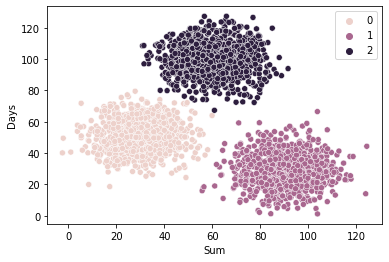

In [ ]:
sns.scatterplot(df['Sum'], df['Days'], hue=points)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


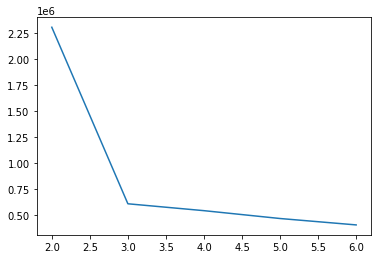

In [ ]:
n_clusters = list(range(2, 7))

metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k).fit(x)
  metrics.append(km.inertia_)

sns.lineplot(n_clusters, metrics)